#1 查看数据

In [2]:
import pandas as pd
data=pd.read_csv('05.Kaggle/0001.Titanic/train.csv')
data.info()
data.describe()

     PassengerId  Survived  Pclass  \
142          143         1       3   
521          522         0       3   

                                                  Name     Sex   Age  SibSp  \
142  Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...  female  24.0      1   
521                                    Vovk, Mr. Janko    male  22.0      0   

     Parch            Ticket     Fare Cabin Embarked  
142      0  STON/O2. 3101279  15.8500   NaN        S  
521      0            349252   7.8958   NaN        S  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null ob

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#2 分析数据

In [3]:
#干掉ticket和cabin，因为这两列缺失值太多，并且对于最后的预测没有任何帮助
df = data.drop(['Ticket', 'Cabin'], axis=1)

#干掉NaN的值
df = df.dropna()

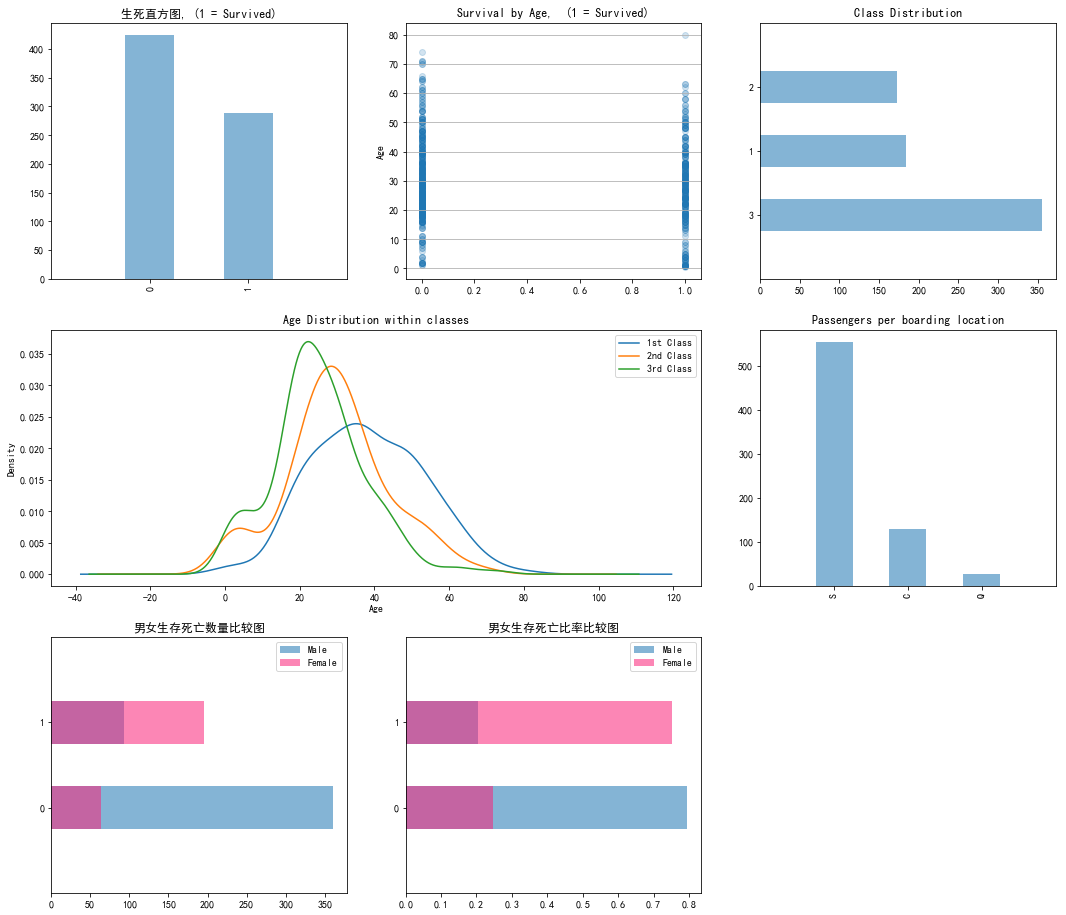

In [16]:
import matplotlib.pyplot as plt
# specifies the parameters of our graphs
figure = plt.figure(figsize=(18,16), facecolor='w')
alpha=alpha_scatterplot = 0.2
alpha_bar_chart = 0.55
ax1 = plt.subplot2grid((3,3),(0,0))
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("生死直方图, (1 = Survived)")

plt.subplot2grid((3,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((3,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((3,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
# plots an axis lable
plt.xlabel("Age")
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best')

ax5 = plt.subplot2grid((3,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

df_male = df.Survived[df.Sex == 'male'].value_counts().sort_index()
df_female = df.Survived[df.Sex == 'female'].value_counts().sort_index()
ax6 = plt.subplot2grid((3,3),(2,0))
df_male.plot(kind='barh',label='Male', alpha=0.55)
df_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("男女生存死亡数量比较图"); 
plt.legend(loc='best')
ax6.set_ylim(-1, 2)

#adjust graph to display the proportions of survival by gender
ax7 = plt.subplot2grid((3,3),(2,1))
(df_male/float(df_male.sum())).plot(kind='barh',label='Male', alpha=0.55)
(df_female/float(df_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("男女生存死亡比率比较图")
plt.legend(loc='best')

ax7.set_ylim(-1, 2)
plt.show()

可以看出，男人死亡率25%大于女人的死亡率20%

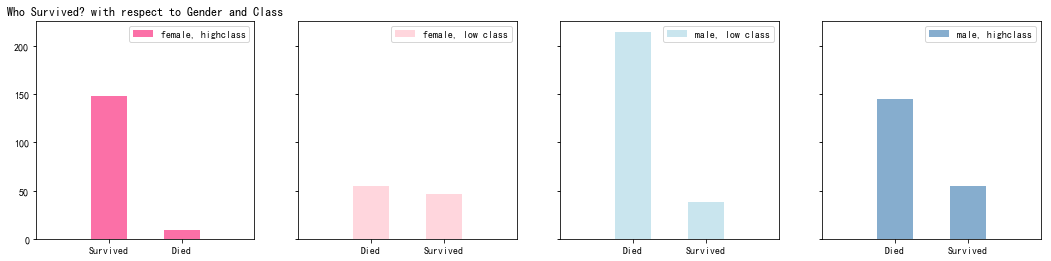

In [19]:
#男女座位等级的分布
fig = plt.figure(figsize=(18,4), facecolor='w')
alpha_level = 0.65

# building on the previous code, here we create an additional subset with in the gender subset 
# we created for the survived variable. I know, thats a lot of subsets. After we do that we call 
# value_counts() so it it can be easily plotted as a bar graph. this is repeated for each gender 
# class pair.
ax1=fig.add_subplot(141)
female_highclass = df.Survived[df.Sex == 'female'][df.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = df.Survived[df.Sex == 'female'][df.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = df.Survived[df.Sex == 'male'][df.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = df.Survived[df.Sex == 'male'][df.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')
plt.show()

In [ ]:
dmatrices()

#3 数据预处理

In [3]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

def replace_name(x):
    if 'Mrs' in x:
        return 'Mrs'
    elif 'Mr' in x:
        return 'Mr'
    else:
        return 'Miss'

def set_missing_age(data):
    train=data[['Age','SibSp_scaled','Parch_scaled',
                # 'Name_0','Name_1','Name_2',
                'Sex_0','Sex_1']]
    known_age=train[train.Age.notnull()].as_matrix()
    unknown_age=train[train.Age.isnull()].as_matrix()
    y=known_age[:,0]
    x=known_age[:,1:]
    rf=RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1) #使用随机森林拟合年龄
    rf.fit(x,y)
    predictage=rf.predict(unknown_age[:,1:])
    data.loc[data.Age.isnull(),'Age']=predictage
    return data,rf
    
data=pd.read_csv('05.Kaggle/0001.Titanic/train.csv')
 
data.drop(['PassengerId','Ticket'],axis=1,inplace=True) #剔除变量
data.loc[data.Embarked.isnull(),'Embarked']='S' #补全Embarked变量

#one-hot编码   
# le_sex=LabelEncoder().fit(data['Sex'])
Sex_label=pd.Categorical(data['Sex']).codes #le_sex.transform(data['Sex'])

ohe_sex=OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1,1))
Sex_ohe=ohe_sex.transform(Sex_label.reshape(-1,1))

# le_embarked=LabelEncoder().fit(data['Embarked'])
Embarked_label=pd.Categorical(data['Embarked']).codes #le_embarked.transform(data['Embarked'])

ohe_embarked=OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1,1))
Embarked_ohe=ohe_embarked.transform(Embarked_label.reshape(-1,1))

data['Name']=data['Name'].map(lambda x:replace_name(x)) # 将Mrs，Mr和Miss从名字中提出来
# le_name=LabelEncoder().fit(data['Name'])
Name_label=pd.Categorical(data['Name']).codes # le_name.transform(data['Name'])

ohe_name=OneHotEncoder(sparse=False).fit(Name_label.reshape(-1,1))
Name_ohe=ohe_name.transform(Name_label.reshape(-1,1))

data['Sex_0']=Sex_ohe[:,0]
data['Sex_1']=Sex_ohe[:,1]
data['Embarked_0']=Embarked_ohe[:,0]
data['Embarked_1']=Embarked_ohe[:,1]
data['Embarked_2']=Embarked_ohe[:,2]
# data['Name_0']=Name_ohe[:,0]
# data['Name_1']=Name_ohe[:,1]
# data['Name_2']=Name_ohe[:,2]

#归一化处理  
Pclass_scale=StandardScaler().fit(data['Pclass'])
data['Pclass_scaled']=StandardScaler().fit_transform(data['Pclass'].reshape(-1,1),Pclass_scale)
Fare_scale=StandardScaler().fit(data['Fare'])
data['Fare_scaled']=StandardScaler().fit_transform(data['Fare'].reshape(-1,1),Fare_scale)
SibSp_scale=StandardScaler().fit(data['SibSp'])
data['SibSp_scaled']=StandardScaler().fit_transform(data['SibSp'].reshape(-1,1),SibSp_scale)
Parch_scale=StandardScaler().fit(data['Parch'])
data['Parch_scaled']=StandardScaler().fit_transform(data['Parch'].reshape(-1,1),Parch_scale)

#预测年纪并补全  
data,rf=set_missing_age(data)
Age_scale=StandardScaler().fit(data['Age'])
data['Age_scaled']=StandardScaler().fit_transform(data['Age'].reshape(-1,1),Age_scale)
train_x=data[['Sex_0','Sex_1','Embarked_0','Embarked_1','Embarked_2',
              # 'Name_0','Name_1','Name_2',
              'Pclass_scaled','Age_scaled','Fare_scaled']].as_matrix()
train_y=data['Survived'].as_matrix()
data.drop(['Pclass','Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked'],axis=1,inplace=True) #剔除变量
data.to_csv('05.Kaggle/0001.Titanic/preDo.csv', index=False)

/anaconda/lib/python3.5/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:65: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a

/anaconda/lib/python3.5/site-packages/sklearn/preprocessing/data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:76: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


#4 数据训练

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import cross_validation, grid_search
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA

data=pd.read_csv('05.Kaggle/0001.Titanic/preDo.csv')
train_x = data[['Sex_0','Sex_1','Embarked_0','Embarked_1','Embarked_2',
                # 'Name_0','Name_1','Name_2',
                'Pclass_scaled','Age_scaled','Fare_scaled']].as_matrix()
train_y = data['Survived'].as_matrix()
# pca = PCA(n_components=2, whiten=True, random_state=0)
# train_x = pca.fit_transform(train_x)

x_tr,x_te,y_tr,y_te=train_test_split(train_x,train_y,test_size=0.3,random_state=0)

knn = KNeighborsClassifier();
knn.fit(x_tr,y_tr)
print(knn.score(x_te,y_te))

lr=LogisticRegression(C=1.0,tol=1e-6)
lr.fit(x_tr,y_tr)
print(lr.score(x_te,y_te))

tuned_parameters = [
    {'kernel': ['rbf'], 'C': [2]}
]

cv = cross_validation.StratifiedKFold(y_tr,4)
svc=grid_search.GridSearchCV(SVC(decision_function_shape='ovo'), param_grid=tuned_parameters, cv=cv)
# svc=SVC(C=2, kernel='rbf', decision_function_shape='ovo')
svc.fit(x_tr,y_tr)
print(svc.best_params_)
print(svc.score(x_te,y_te))

randomf=RandomForestClassifier(n_estimators=500,max_depth=4,random_state=0)
randomf.fit(x_tr,y_tr)
print(randomf.score(x_te,y_te))

gdbt=GradientBoostingClassifier(n_estimators=600,max_depth=1,random_state=0)
gdbt.fit(x_tr,y_tr)
print(gdbt.score(x_te,y_te))

/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.5/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


0.783582089552


0.791044776119
{'C': 2, 'kernel': 'rbf'}
0.817164179104


0.805970149254


0.817164179104


#5 在测试集上进行测试